## 데이터 시각화

### 시계열 그래프

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('kto_total.xlsx')
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,76.0,82.1
1,대만,35788,41,17,37,516,36399,2010-01,아시아,97.0,50.6
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,98.3,8.9
3,마카오,554,0,0,0,0,554,2010-01,아시아,95.4,3.5
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,100.0,0.1


In [4]:
# 한글 폰트
from matplotlib import font_manager, rc
path = 'c:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname = path).get_name()
rc('font', family=font_name)

In [5]:
import matplotlib.pyplot as plt

In [6]:
# 중국 국적의 데이터 필터링
condition = (df['국적'] == '중국')
df_filter = df[condition]
df_filter.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,70.2,0.6
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,64.8,0.5
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,65.0,0.4
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,75.0,0.3
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,72.9,0.4


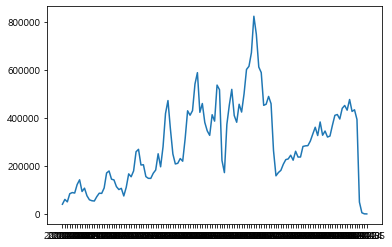

In [7]:
# 시계열 그래프 1
plt.plot(df_filter['기준년월'], df_filter['관광'])
plt.show()

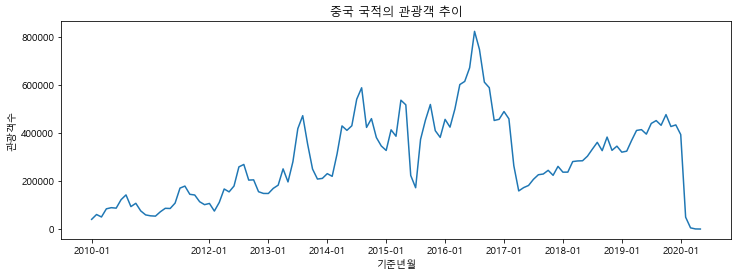

In [8]:
plt.figure(figsize = (12,4))
plt.plot(df_filter['기준년월'], df_filter['관광'])
plt.title('중국 국적의 관광객 추이')
plt.xlabel('기준년월')
plt.ylabel('관광객수')
plt.xticks(['2010-01','2011-01','2012-01','2013-01','2014-01','2015-01','2016-01','2017-01','2018-01','2019-01','2020-01'])
plt.show()

#### 중국인 관광객 시계열 그래프
1. (Trend) 2010년부터 2016년 까지 관광객 수가 꾸준히 증가하는 추세
2. (Event) 2017년 초에 관광객 수가 큰 폭으로 감소
3. (Trend) 2017년 중순부터 관관객 수가 완만하게 증가하는 추세
4. (Seasonality) 매년 여름에 관광객 수가 완만하게 증가하는 추세
5. (Event) 단, 2015년 여름에는 관광객 수가 큰 폭으로 감소
6. (Event) 2020년 초에 관광객 수가 0에 가까워질만큼 급격히 감소

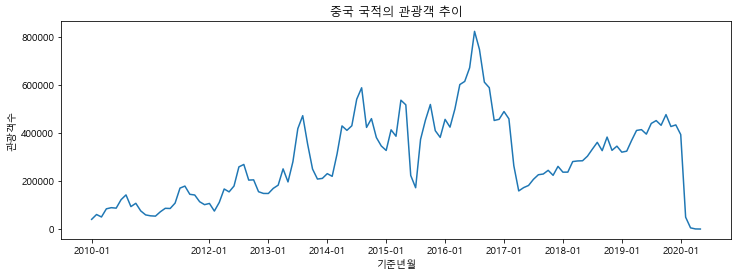

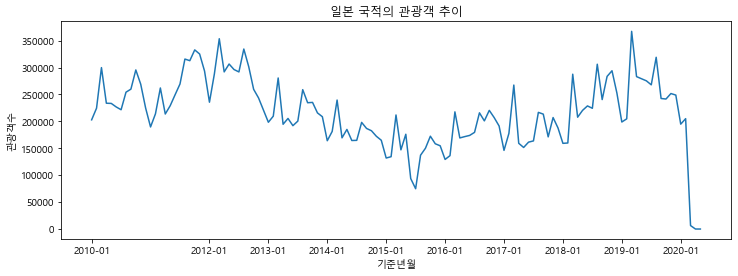

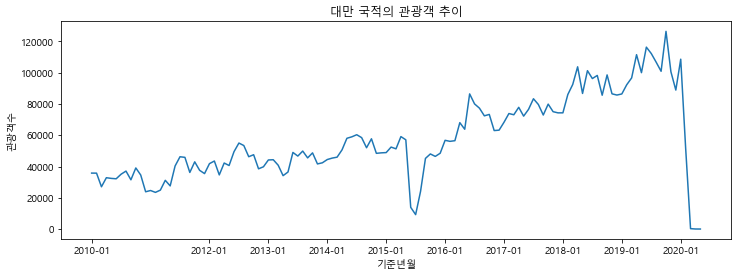

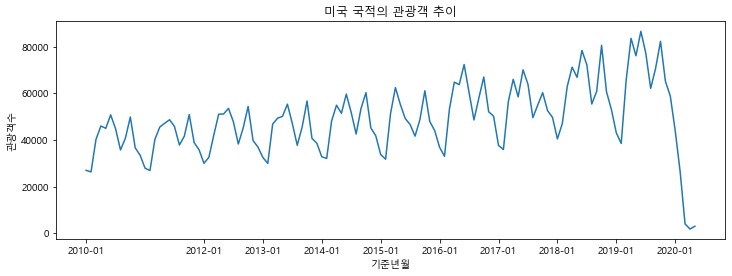

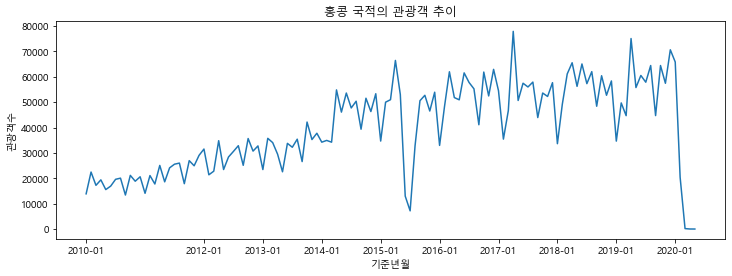

In [17]:
# 우리나라를 방문하는 외국인 관광객 중 상위 5개 국가의 리스트 만들기
cntry_list = ['중국','일본','대만','미국','홍콩']

for cntry in cntry_list:
    # 국적 관광객만 추출
    condition = (df['국적'] == cntry)
    df_filter = df[condition]

    plt.figure(figsize = (12,4))
    plt.plot(df_filter['기준년월'], df_filter['관광'])
    plt.title('{} 국적의 관광객 추이'.format(cntry))
    plt.xlabel('기준년월')
    plt.ylabel('관광객수')
    plt.xticks(['2010-01','2011-01','2012-01','2013-01','2014-01','2015-01','2016-01','2017-01','2018-01','2019-01','2020-01'])
    plt.show()

### 히트맵 그리기
- 히트맵 그래프 : 매트릭스(matrix) 형태에 포함된 각 값을 컬러로 표현하는 데이터 시각화 방법
- 전체 데이터를 한눈에 파악할 수 있다.
- x축, y축에 어떤 변수를 넣을지 고민해야 함.

In [18]:
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,76.0,82.1
1,대만,35788,41,17,37,516,36399,2010-01,아시아,97.0,50.6
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,98.3,8.9
3,마카오,554,0,0,0,0,554,2010-01,아시아,95.4,3.5
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,100.0,0.1


In [19]:
# x축 : 월(Month), y축 : 연도(Year)
# str : Series 값들을 문자형태로 바꿔줌
# slice : 앞의 문자열 중 해당 값 추출

df['년도'] = df['기준년월'].str.slice(0,4)
df['월'] = df['기준년월'].str.slice(5,7)
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도,월
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,76.0,82.1,2010,01
1,대만,35788,41,17,37,516,36399,2010-01,아시아,97.0,50.6,2010,01
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,98.3,8.9,2010,01
3,마카오,554,0,0,0,0,554,2010-01,아시아,95.4,3.5,2010,01
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,100.0,0.1,2010,01


In [31]:
# 중국인 관광객 필터링
condition = (df['국적'] == '중국')
df_filter = df[condition]
print(type(df_filter))
df_filter.head()

<class 'pandas.core.frame.DataFrame'>


,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도,월
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,70.2,0.6,2010,01
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,64.8,0.5,2010,02
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,65.0,0.4,2010,03
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,75.0,0.3,2010,04
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,72.9,0.4,2010,05


In [32]:
# pivot_table
df_pivot = df_filter.pivot_table(values='관광', index='년도', columns='월')
print(type(df_pivot))
df_pivot

<class 'pandas.core.frame.DataFrame'>


월,01,02,03,04,05,06,07,08,09,10,11,12
년도,,,,,,,,,,,,
2010,40425.0,60590.0,50330.0,84252.0,89056.0,87080.0,122432.0,142180.0,93545.0,107237.0,75686.0,58987.0
2011,55070.0,53863.0,72003.0,86397.0,85668.0,108060.0,170524.0,178937.0,144704.0,141824.0,113856.0,101605.0
2012,106606.0,74895.0,110965.0,166843.0,154841.0,179074.0,258907.0,268988.0,203857.0,204866.0,155503.0,148320.0
2013,148118.0,169395.0,182850.0,250549.0,196306.0,280319.0,417991.0,472005.0,353359.0,249850.0,208175.0,210950.0
2014,230706.0,219533.0,313400.0,429419.0,410971.0,429991.0,540683.0,588181.0,423133.0,459708.0,381118.0,345957.0
2015,327225.0,413096.0,386386.0,536428.0,517154.0,223101.0,172075.0,372990.0,453670.0,518651.0,409635.0,381722.0
2016,456636.0,424232.0,500018.0,601460.0,614636.0,671493.0,823016.0,747818.0,611538.0,588561.0,452082.0,456882.0
2017,489256.0,458952.0,263788.0,158784.0,172527.0,181507.0,207099.0,226153.0,229172.0,244541.0,223743.0,260983.0
2018,236825.0,237075.0,281020.0,283533.0,284317.0,303405.0,332657.0,360982.0,326438.0,382922.0,327664.0,345135.0


In [26]:
# seaborn 라이브러리는 matplotlib 라이브러리에 종속
import matplotlib.pyplot as plt
import seaborn as sns

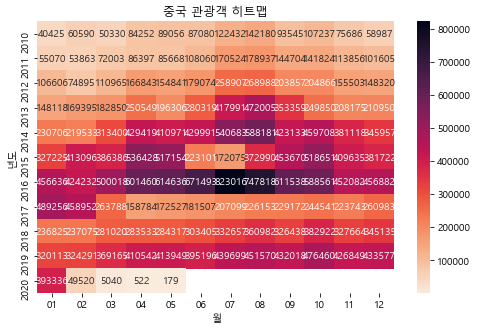

In [33]:
plt.figure(figsize=(8,5))
sns.heatmap(df_pivot, 
            annot=True,        # 각 간에 실제 값 표시
            fmt = '.0f',       # 소수점 없는 실수형
            cmap = 'rocket_r') # 그래프 색깔 조합 지정
plt.title('중국 관광객 히트맵')
plt.show()

#### 중국인 관광객 히트맵 그래프
1. (Trend) 위(2010년 01월)에서 아래(2017년 2월)로 오면서 색깔이 진해지는 것으로 보아 \
    2010년 1월부터 2017년 2월까지 관광객수가 꾸준히 증가하는 추세
2. (Seasonality) 각 연도를 기준으로 봤을 때, 7~8월이 대체로 진한 색깔로서 가장 관광객이 많이 방문하는 패턴을 보이며 \
    그다음으로는 4,10월이 높은 패턴으로 나타남.
3. (Event) 2015년 6~8월에 관광객 수가 적음
4. (Event) 2017년 3~6월까지 관광객 수가 매우 적음
5. (Trend) 2017년 7월부터 2019년 4월까지 관광객수가 점차 많아짐
6. (Event) 2020년 2월부터 관광객 수가 급격히 줄어듬.

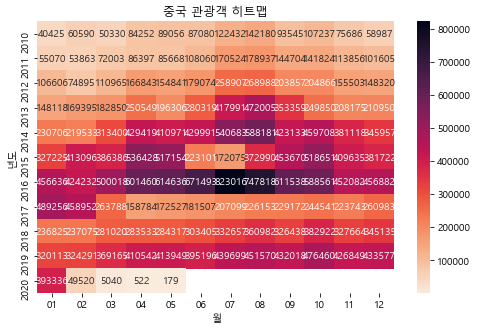

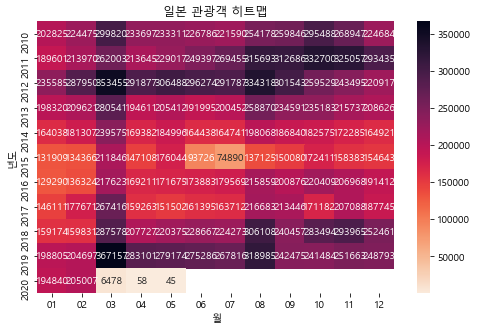

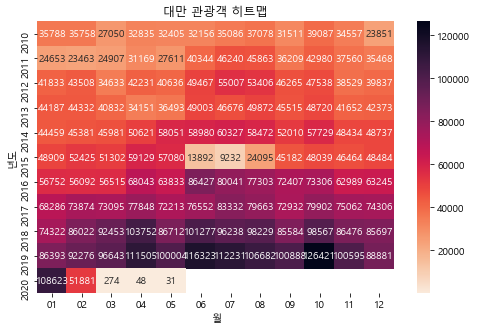

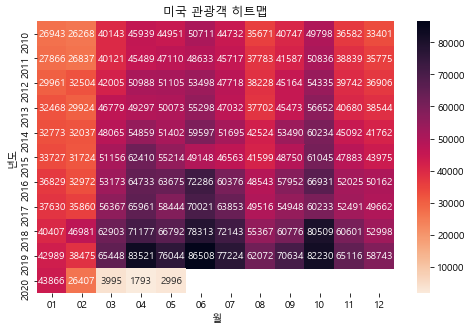

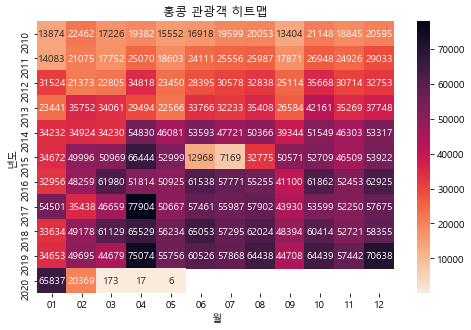

In [29]:
# 상위 5개국에 대한 히트맵 그리기
cntry_list = ['중국','일본','대만','미국','홍콩']
for cntry in cntry_list:
    condition = (df['국적'] == cntry)
    df_filter = df[condition]
    df_pivot = df_filter.pivot_table(values = '관광', index = '년도', columns='월')
    
    plt.figure(figsize=(8,5))
    sns.heatmap(df_pivot, annot=True, fmt = '.0f', cmap = 'rocket_r')
    plt.title('{} 관광객 히트맵'.format(cntry))
    plt.show()

### 시각화 해석

- 두 그래프 공통점
1. (Seasonality) 중국인 관광객은 '여름>봄, 가을> 겨울' 순으로 많이 방문
2. (Trend) 중국인 관광객 숫자가 계속해서 증가
3. (Event) 2015년 여름(6~8월), 2017년 3월, 2020년 2월 관광객 수 급감 
    - 2015년 여름(6~8월) : 메르스 여파
    - 2017년 3월 : 중국의 사드 보복 조치
    - 2020년 2월 : 코로나 바이러스